In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV


In [2]:
train_df=pd.read_csv("Titanic_train.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df=pd.read_csv("Titanic_test.csv")

In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploratory Data Analysis 

In [6]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

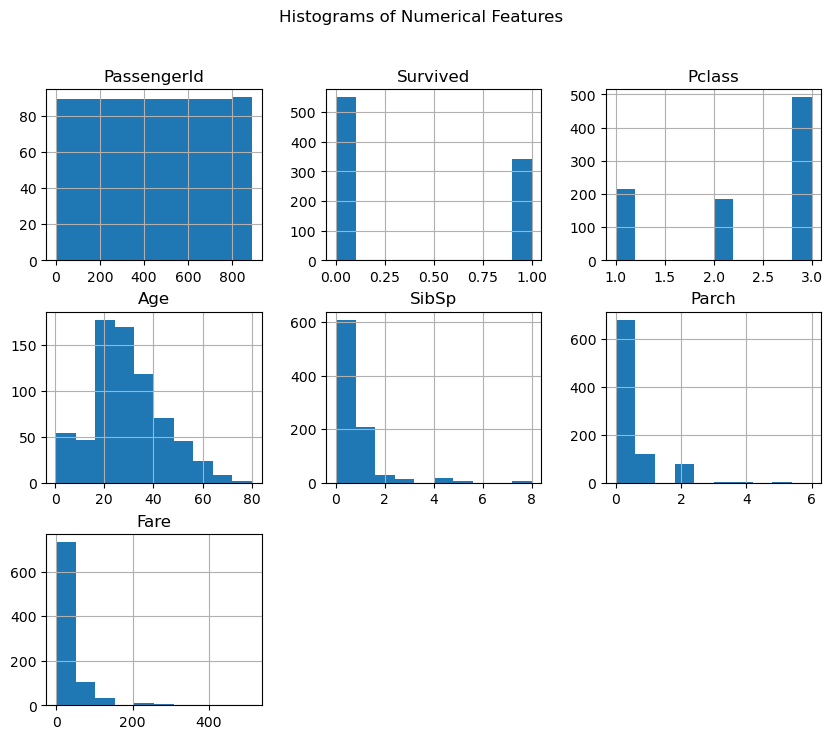

In [13]:
train_df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

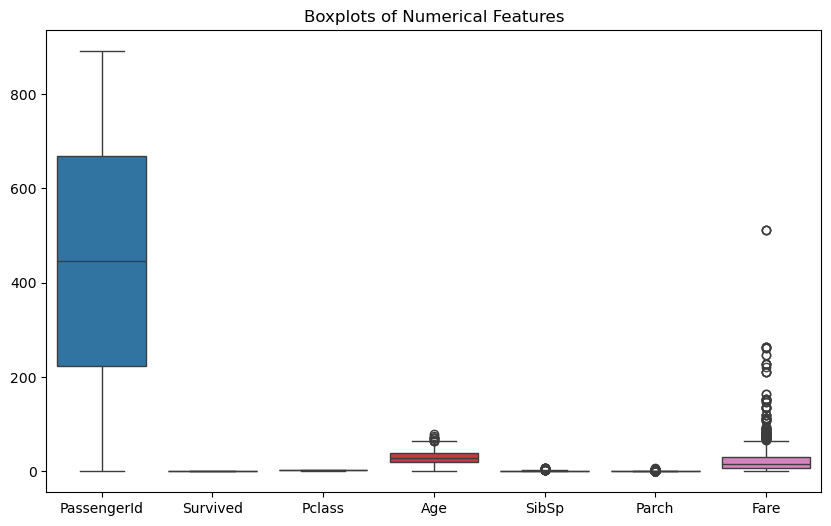

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplots of Numerical Features")
plt.show()

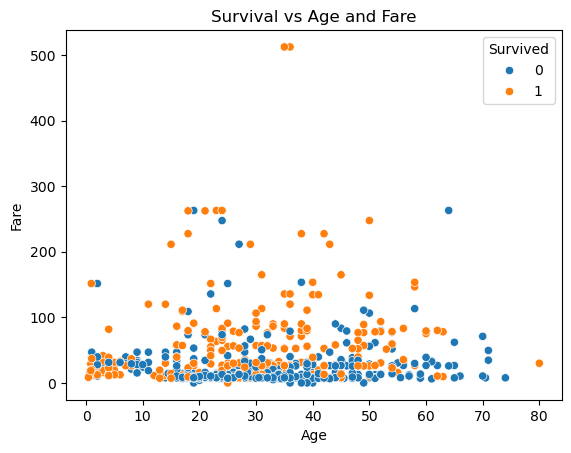

In [15]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title("Survival vs Age and Fare")
plt.show()

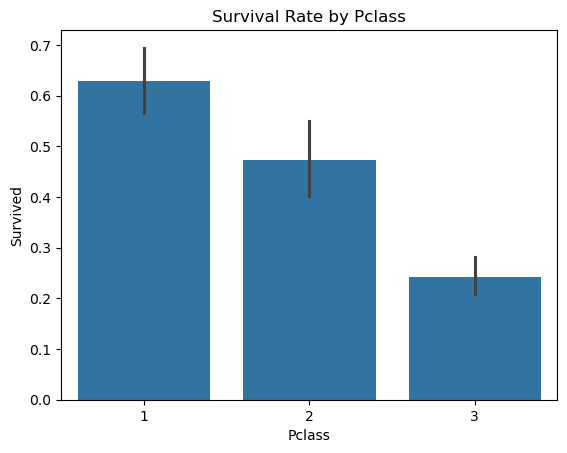

In [16]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()


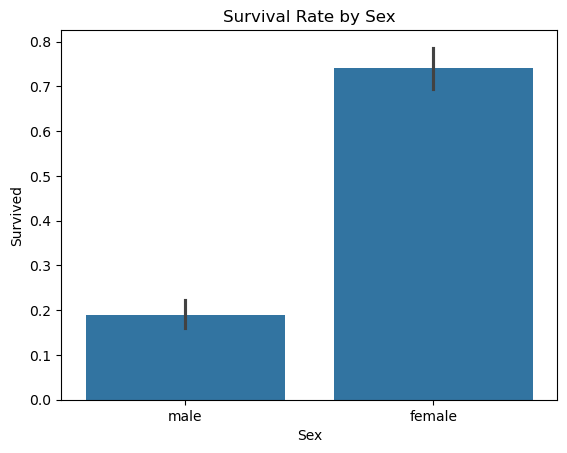

In [17]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title("Survival Rate by Sex")
plt.show()

# Data Preprocessing:

In [18]:
age_imputer = SimpleImputer(strategy='median')
train_df['Age'] = age_imputer.fit_transform(train_df[['Age']])
test_df['Age'] = age_imputer.transform(test_df[['Age']])

In [19]:
train_df.drop(columns="Cabin", inplace=True)
test_df.drop(columns="Cabin",inplace=True)

In [20]:
train_df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [21]:
train_df.Embarked  = train_df.Embarked .fillna("S")

In [22]:
fare_imputer = SimpleImputer(strategy='median')
test_df['Fare'] = fare_imputer.fit_transform(test_df[['Fare']])

In [23]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [24]:
print(test_df.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [25]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [26]:
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [27]:
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.transform(test_df['Sex'])

In [28]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

In [29]:
label_encoder = LabelEncoder()

train_df['Embarked_Q'] = label_encoder.fit_transform(train_df.Embarked_Q)
test_df["Embarked_Q"] = label_encoder.fit_transform(test_df.Embarked_Q)

train_df['Embarked_S'] = label_encoder.fit_transform(train_df.Embarked_S)
test_df["Embarked_S"] = label_encoder.fit_transform(test_df.Embarked_S)

In [30]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [31]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,0,1
414,1,0,39.0,0,0,108.9000,0,0
415,3,1,38.5,0,0,7.2500,0,1
416,3,1,28.0,0,0,8.0500,0,1


# Building Predictive Models:

In [36]:
X_train = train_df.drop(columns="Survived")
y_train = train_df["Survived"]

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [62]:
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 281, number of negative: 431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394663 -> initscore=-0.427753
[LightGBM] [Info] Start training from score -0.427753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [63]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [64]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 281, number of negative: 431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394663 -> initscore=-0.427753
[LightGBM] [Info] Start training from score -0.427753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# Comparative Analysis

In [71]:
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)


In [76]:
def prediction(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(f"Train Accuracy: {model.score(X_train,y_train)}")
    print(f"Test Accuracy: {model.score(X_test,y_test)}")
    print(classification_report(y_test,ypred))

In [77]:
from xgboost import XGBClassifier

In [80]:
prediction(XGBClassifier())

Train Accuracy: 0.9691011235955056
Test Accuracy: 0.8547486033519553
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.81      0.75      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [82]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 5]  # Use this if classes are imbalanced
}


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.datasets import make_classification
# Initialize the XGBoost classifier for binary classification
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')

# Define the scoring metric (in this case, accuracy)
scorer = make_scorer(accuracy_score)

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)


In [85]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:14:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'scale_pos_weight': [1, 2, 5],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(accuracy_score, response_method='predict'),
             verbose=1)

In [86]:
# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Best estimator accuracy on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Model:", accuracy)
print(classification_report(y_test,y_pred))


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.8}
Test Accuracy with Best Model: 0.8659217877094972
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       118
           1       0.85      0.74      0.79        61

    accuracy                           0.87       179
   macro avg       0.86      0.83      0.85       179
weighted avg       0.86      0.87      0.86       179



In [89]:
prediction(LGBMClassifier())

[LightGBM] [Info] Number of positive: 281, number of negative: 431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394663 -> initscore=-0.427753
[LightGBM] [Info] Start training from score -0.427753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [90]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 10, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}


In [91]:
# Initialize the LightGBM classifier for binary classification
lgb_model = LGBMClassifier(objective='binary', metric='binary_logloss')

# Define the scoring metric (accuracy in this case)
scorer = make_scorer(accuracy_score)

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)


In [92]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
[LightGBM] [Info] Number of positive: 281, number of negative: 431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394663 -> initscore=-0.427753
[LightGBM] [Info] Start training from score -0.427753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

GridSearchCV(cv=3,
             estimator=LGBMClassifier(metric='binary_logloss',
                                      objective='binary'),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 10, 20],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 50, 70], 'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0, 0.1, 0.5], 'subsample': [0.8, 1.0]},
             scoring=make_scorer(accuracy_score, response_method='predict'),
             verbose=1)

In [93]:
# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Best estimator accuracy on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Model:", accuracy)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.8}
Test Accuracy with Best Model: 0.8659217877094972
